# **Project 41: Working Capital Optimization**

***Pandas*** : *A library for data manipulation and analysis, offering data structures like DataFrames.*

***NumPy*** : *A library for numerical computing in Python, providing support for arrays and mathematical functions.*

***Seaborn*** : *A data visualization library built on Matplotlib, offering enhanced and aesthetically pleasing statistical plots.*

***Matplotlib*** : *A plotting library for creating static, animated, and interactive visualizations in Python.*

***Warnings*** : *A module to control the display of warning messages, allowing filtering or suppression.*

# **Data Loading**

**Importing these libraries for Data Loading, Data Cleaning and Data Visualization.**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings

**Setup Connection: Establishes a connection to an SQL Server database using pyodbc with the provided server, database, username, and password.**

**Execute Query: Runs a SQL query to select all data from the receivables_data table and reads the result into a Pandas DataFrame.**

**Close Connection: Closes the database connection and prints the first few rows of the DataFrame.**

In [ ]:
import pyodbc

server = 'workingcapitaloptimization.czequmoiqs5c.eu-north-1.rds.amazonaws.com'
database = 'dbo.receivables_data'
username = 'admin'
password = 'your password here!!'

conn_str = (
    f'DRIVER={{ODBC Driver 17 for SQL Server}};'
    f'SERVER={server};'
    f'DATABASE={database};'
    f'UID={username};'
    f'PWD={password}'
)

conn = pyodbc.connect(conn_str)

query = 'SELECT * FROM dbo.receivables_data'

df = pd.read_sql(query, conn)

conn.close()

**Suppresses all warnings in Python by setting the warning filter to "ignore".**

In [2]:
warnings.simplefilter("ignore")

**Load Data: Reads an Excel file (receivables_data.xls) into a Pandas DataFrame (df).**

**Display Data: Shows the first 5 rows of the DataFrame using the head(5) method.**

In [3]:
df = pd.read_excel("/content/receivables_data.xls")
df.head(5)

,Business Code,Customer Number,Customer Name,Payment_Date,Business Year,Posting_Date,Due_Date,Payterm,Invoice Currency,Total Open Amount,USD_CURRENNCY,Total Open Amount_USD,Customer Payment Terms,Invoice ID,Is Open,DUNNLEVEL,Credit_limit,Baseline_Date,Region
0,U001,200769623,WAL-MAR corp,2020-02-11 00:00:00,2020,2020-01-26,2020-02-10,15,USD,54273,USD,54273.280,NAH4,1.930438e+09,0,0,50000,2020-01-23,WEST
1,U001,200980828,BEN E,2019-08-08 00:00:00,2019,2019-07-22,2019-08-11,20,USD,79657,USD,79656.600,NAD1,1.929646e+09,0,2,50000,2019-07-20,MIDWEST
2,U001,200792734,MDV/ trust,2019-12-30 00:00:00,2019,2019-09-14,2019-09-29,15,USD,2254,USD,2253.860,NAA8,1.929874e+09,0,3,100000,2019-09-14,NORTHEAST
3,CA02,140105686,SYSC llc,01/00/1900,2020,2020-03-30,2020-04-10,11,CAD,3300,USD,2441.778,CA10,2.960623e+09,1,2,100000,2020-03-26,SOUTHWEST
4,U001,200769623,WAL-MAR foundation,2019-11-25 00:00:00,2019,2019-11-13,2019-11-28,15,USD,33133,USD,33133.290,NAH4,1.930148e+09,0,3,100000,2019-11-10,WEST


**The code removes the columns "Customer Number", "Customer Name", "Invoice ID", and "Payment_Date" from the DataFrame df in place. It then displays the first 5 rows of the modified DataFrame.**

In [4]:
df.drop(columns=["Customer Number", "Customer Name", "Invoice ID", "Payment_Date"], inplace=True)
df.head(5)

,Business Code,Business Year,Posting_Date,Due_Date,Payterm,Invoice Currency,Total Open Amount,USD_CURRENNCY,Total Open Amount_USD,Customer Payment Terms,Is Open,DUNNLEVEL,Credit_limit,Baseline_Date,Region
0,U001,2020,2020-01-26,2020-02-10,15,USD,54273,USD,54273.280,NAH4,0,0,50000,2020-01-23,WEST
1,U001,2019,2019-07-22,2019-08-11,20,USD,79657,USD,79656.600,NAD1,0,2,50000,2019-07-20,MIDWEST
2,U001,2019,2019-09-14,2019-09-29,15,USD,2254,USD,2253.860,NAA8,0,3,100000,2019-09-14,NORTHEAST
3,CA02,2020,2020-03-30,2020-04-10,11,CAD,3300,USD,2441.778,CA10,1,2,100000,2020-03-26,SOUTHWEST
4,U001,2019,2019-11-13,2019-11-28,15,USD,33133,USD,33133.290,NAH4,0,3,100000,2019-11-10,WEST


**This code snippet counts the number of missing (null) values in each column of the DataFrame df and returns the results as a series.**

In [5]:
df.isnull().sum()

,0
Business Code,0
Business Year,0
Posting_Date,0
Due_Date,0
Payterm,0
Invoice Currency,0
Total Open Amount,0
USD_CURRENNCY,0
Total Open Amount_USD,0
Customer Payment Terms,0


**This code snippet provides a concise summary of the DataFrame df, including the number of entries, column names, data types, and the number of non-null values in each column.**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Business Code           50000 non-null  object        
 1   Business Year           50000 non-null  int64         
 2   Posting_Date            50000 non-null  datetime64[ns]
 3   Due_Date                50000 non-null  datetime64[ns]
 4   Payterm                 50000 non-null  int64         
 5   Invoice Currency        50000 non-null  object        
 6   Total Open Amount       50000 non-null  int64         
 7   USD_CURRENNCY           50000 non-null  object        
 8   Total Open Amount_USD   50000 non-null  float64       
 9   Customer Payment Terms  50000 non-null  object        
 10  Is Open                 50000 non-null  int64         
 11  DUNNLEVEL               50000 non-null  int64         
 12  Credit_limit            50000 non-null  int64 

# **Data Visualization**

**The df.shape command returns a tuple representing the dimensions of the DataFrame df, showing the number of rows and columns as (rows, columns).**

In [7]:
df.shape

(50000, 15)

**Count Values: Counts the occurrences of each unique value in the "Business Code" column of the DataFrame df.**

**Plot Pie Chart: Creates a pie chart with the counts, labeling each slice with its corresponding "Business Code" and displaying the percentage of each category using autopct="%.1f%%".**

**Show Plot: Displays the pie chart using plt.show().**

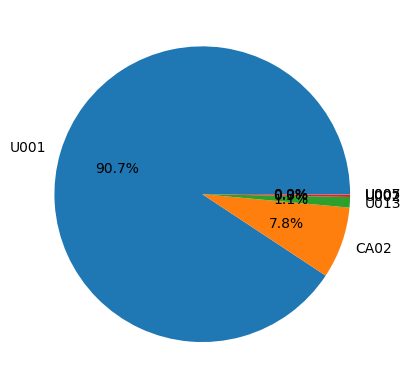

In [8]:
Business_Code = df["Business Code"].value_counts()

plt.pie(Business_Code, labels=Business_Code.index, autopct="%.1f%%")
plt.show()

**Count Values: Counts the occurrences of each unique value in the "Region" column of the DataFrame df.**

**Plot Bar Chart: Creates a bar chart displaying the count of entries per region, with bars colored in different colors, and labels the x-axis as 'Region', the y-axis as 'Count', and adds a title 'Number Of Entries Per Region'.**

**Show Plot: Displays the bar chart using plt.show().**

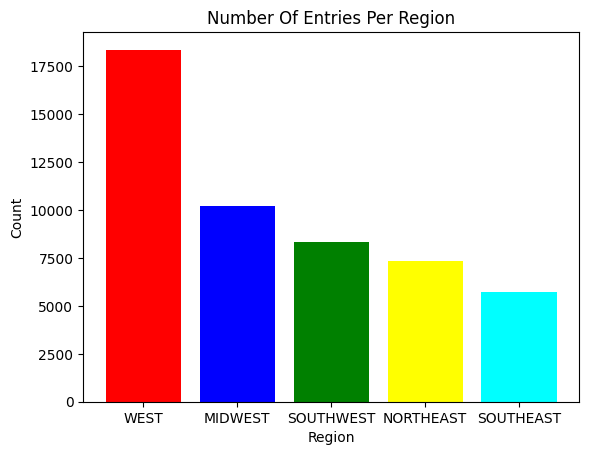

In [9]:
region_counts = df["Region"].value_counts()

plt.bar(region_counts.index, region_counts.values, color=["red", "blue", "green", "yellow", "cyan"])

plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Number Of Entries Per Region')

plt.show()

**The df.head(5) command displays the first 5 rows of the DataFrame df, providing a preview of the data.**

In [10]:
df.head(5)

,Business Code,Business Year,Posting_Date,Due_Date,Payterm,Invoice Currency,Total Open Amount,USD_CURRENNCY,Total Open Amount_USD,Customer Payment Terms,Is Open,DUNNLEVEL,Credit_limit,Baseline_Date,Region
0,U001,2020,2020-01-26,2020-02-10,15,USD,54273,USD,54273.280,NAH4,0,0,50000,2020-01-23,WEST
1,U001,2019,2019-07-22,2019-08-11,20,USD,79657,USD,79656.600,NAD1,0,2,50000,2019-07-20,MIDWEST
2,U001,2019,2019-09-14,2019-09-29,15,USD,2254,USD,2253.860,NAA8,0,3,100000,2019-09-14,NORTHEAST
3,CA02,2020,2020-03-30,2020-04-10,11,CAD,3300,USD,2441.778,CA10,1,2,100000,2020-03-26,SOUTHWEST
4,U001,2019,2019-11-13,2019-11-28,15,USD,33133,USD,33133.290,NAH4,0,3,100000,2019-11-10,WEST


# **Data Cleaning**

**Convert Date: Converts the Posting_Date column to a datetime format.**

**Extract Date Components: Creates new columns for the day, month, and year extracted from Posting_Date, naming them Posting_Day, Posting_Month, and Posting_Year, respectively.**

**Drop Original Date Column: Removes the original Posting_Date column from the DataFrame.**

**Display Data: Shows the first 5 rows of the updated DataFrame.**

In [11]:
df['Posting_Date'] = pd.to_datetime(df['Posting_Date'])

df['Posting_Day'] = df['Posting_Date'].dt.day
df['Posting_Month'] = df['Posting_Date'].dt.month
df['Posting_Year'] = df['Posting_Date'].dt.year

df.drop(columns=["Posting_Date"], inplace=True)

df.head(5)

,Business Code,Business Year,Due_Date,Payterm,Invoice Currency,Total Open Amount,USD_CURRENNCY,Total Open Amount_USD,Customer Payment Terms,Is Open,DUNNLEVEL,Credit_limit,Baseline_Date,Region,Posting_Day,Posting_Month,Posting_Year
0,U001,2020,2020-02-10,15,USD,54273,USD,54273.280,NAH4,0,0,50000,2020-01-23,WEST,26,1,2020
1,U001,2019,2019-08-11,20,USD,79657,USD,79656.600,NAD1,0,2,50000,2019-07-20,MIDWEST,22,7,2019
2,U001,2019,2019-09-29,15,USD,2254,USD,2253.860,NAA8,0,3,100000,2019-09-14,NORTHEAST,14,9,2019
3,CA02,2020,2020-04-10,11,CAD,3300,USD,2441.778,CA10,1,2,100000,2020-03-26,SOUTHWEST,30,3,2020
4,U001,2019,2019-11-28,15,USD,33133,USD,33133.290,NAH4,0,3,100000,2019-11-10,WEST,13,11,2019


**Convert Date: Converts the Due_Date column to datetime format.**

**Extract Date Components: Creates new columns for the day, month, and year extracted from Due_Date, naming them Due_Day, Due_Month, and Due_Year, respectively.**

**Drop Original Date Column: Removes the original Due_Date column from the DataFrame.**

**Display Data: Shows the first 5 rows of the updated DataFrame.**

In [12]:
df['Due_Date'] = pd.to_datetime(df['Due_Date'])

df['Due_Day'] = df['Due_Date'].dt.day
df['Due_Month'] = df['Due_Date'].dt.month
df['Due_Year'] = df['Due_Date'].dt.year

df.drop(columns=["Due_Date"], inplace=True)

df.head(5)

,Business Code,Business Year,Payterm,Invoice Currency,Total Open Amount,USD_CURRENNCY,Total Open Amount_USD,Customer Payment Terms,Is Open,DUNNLEVEL,Credit_limit,Baseline_Date,Region,Posting_Day,Posting_Month,Posting_Year,Due_Day,Due_Month,Due_Year
0,U001,2020,15,USD,54273,USD,54273.280,NAH4,0,0,50000,2020-01-23,WEST,26,1,2020,10,2,2020
1,U001,2019,20,USD,79657,USD,79656.600,NAD1,0,2,50000,2019-07-20,MIDWEST,22,7,2019,11,8,2019
2,U001,2019,15,USD,2254,USD,2253.860,NAA8,0,3,100000,2019-09-14,NORTHEAST,14,9,2019,29,9,2019
3,CA02,2020,11,CAD,3300,USD,2441.778,CA10,1,2,100000,2020-03-26,SOUTHWEST,30,3,2020,10,4,2020
4,U001,2019,15,USD,33133,USD,33133.290,NAH4,0,3,100000,2019-11-10,WEST,13,11,2019,28,11,2019


**Convert Date: Converts the Baseline_Date column to datetime format.**

**Extract Date Components: Creates new columns for the day, month, and year extracted from Baseline_Date, naming them Baseline_Day, Baseline_Month, and Baseline_Year, respectively.**

**Drop Original Date Column: Removes the original Baseline_Date column from the DataFrame.**

**Display Data: Shows the first 5 rows of the updated DataFrame.**

In [13]:
df['Baseline_Date'] = pd.to_datetime(df['Baseline_Date'])

df['Baseline_Day'] = df['Baseline_Date'].dt.day
df['Baseline_Month'] = df['Baseline_Date'].dt.month
df['Baseline_Year'] = df['Baseline_Date'].dt.year

df.drop(columns=["Baseline_Date"], inplace=True)

df.head(5)

,Business Code,Business Year,Payterm,Invoice Currency,Total Open Amount,USD_CURRENNCY,Total Open Amount_USD,Customer Payment Terms,Is Open,DUNNLEVEL,...,Region,Posting_Day,Posting_Month,Posting_Year,Due_Day,Due_Month,Due_Year,Baseline_Day,Baseline_Month,Baseline_Year
0,U001,2020,15,USD,54273,USD,54273.280,NAH4,0,0,...,WEST,26,1,2020,10,2,2020,23,1,2020
1,U001,2019,20,USD,79657,USD,79656.600,NAD1,0,2,...,MIDWEST,22,7,2019,11,8,2019,20,7,2019
2,U001,2019,15,USD,2254,USD,2253.860,NAA8,0,3,...,NORTHEAST,14,9,2019,29,9,2019,14,9,2019
3,CA02,2020,11,CAD,3300,USD,2441.778,CA10,1,2,...,SOUTHWEST,30,3,2020,10,4,2020,26,3,2020
4,U001,2019,15,USD,33133,USD,33133.290,NAH4,0,3,...,WEST,13,11,2019,28,11,2019,10,11,2019


**This code snippet counts the occurrences of each unique value in the "Invoice Currency" column of the DataFrame df and returns the results as a series.**

In [14]:
df["Invoice Currency"].value_counts()

,count
Invoice Currency,
USD,46081
CAD,3919


**The code applies one-hot encoding to the "Invoice Currency" column, converting it into multiple binary columns. It then displays the first 5 rows of the updated DataFrame.**

In [15]:
df = pd.get_dummies(df, columns=["Invoice Currency"])
df.head(5)

,Business Code,Business Year,Payterm,Total Open Amount,USD_CURRENNCY,Total Open Amount_USD,Customer Payment Terms,Is Open,DUNNLEVEL,Credit_limit,...,Posting_Month,Posting_Year,Due_Day,Due_Month,Due_Year,Baseline_Day,Baseline_Month,Baseline_Year,Invoice Currency_CAD,Invoice Currency_USD
0,U001,2020,15,54273,USD,54273.280,NAH4,0,0,50000,...,1,2020,10,2,2020,23,1,2020,False,True
1,U001,2019,20,79657,USD,79656.600,NAD1,0,2,50000,...,7,2019,11,8,2019,20,7,2019,False,True
2,U001,2019,15,2254,USD,2253.860,NAA8,0,3,100000,...,9,2019,29,9,2019,14,9,2019,False,True
3,CA02,2020,11,3300,USD,2441.778,CA10,1,2,100000,...,3,2020,10,4,2020,26,3,2020,True,False
4,U001,2019,15,33133,USD,33133.290,NAH4,0,3,100000,...,11,2019,28,11,2019,10,11,2019,False,True


**Convert Data Types: Changes the data types of the "Invoice Currency_CAD" and "Invoice Currency_USD" columns to integers.**

**Display Data: Shows the first 5 rows of the updated DataFrame.**

In [16]:
df["Invoice Currency_CAD"] = df["Invoice Currency_CAD"].astype(int)
df["Invoice Currency_USD"] = df["Invoice Currency_USD"].astype(int)

df.head(5)

,Business Code,Business Year,Payterm,Total Open Amount,USD_CURRENNCY,Total Open Amount_USD,Customer Payment Terms,Is Open,DUNNLEVEL,Credit_limit,...,Posting_Month,Posting_Year,Due_Day,Due_Month,Due_Year,Baseline_Day,Baseline_Month,Baseline_Year,Invoice Currency_CAD,Invoice Currency_USD
0,U001,2020,15,54273,USD,54273.280,NAH4,0,0,50000,...,1,2020,10,2,2020,23,1,2020,0,1
1,U001,2019,20,79657,USD,79656.600,NAD1,0,2,50000,...,7,2019,11,8,2019,20,7,2019,0,1
2,U001,2019,15,2254,USD,2253.860,NAA8,0,3,100000,...,9,2019,29,9,2019,14,9,2019,0,1
3,CA02,2020,11,3300,USD,2441.778,CA10,1,2,100000,...,3,2020,10,4,2020,26,3,2020,1,0
4,U001,2019,15,33133,USD,33133.290,NAH4,0,3,100000,...,11,2019,28,11,2019,10,11,2019,0,1


**The code counts the occurrences of each unique value in the "USD_CURRENNCY" column of the DataFrame df and returns the results as a series**

In [17]:
df["USD_CURRENNCY"].value_counts()

,count
USD_CURRENNCY,
USD,50000


**The code defines a mapping USD_CURRENNCY_MAP where "USD" is mapped to 0. It then applies this mapping to the "USD_CURRENNCY" column using .map(). Finally, it displays the first 5 rows of the updated DataFrame.**

In [18]:
USD_CURRENNCY_MAP = {"USD" : 0}

df["USD_CURRENNCY"] = df["USD_CURRENNCY"].map(USD_CURRENNCY_MAP)

df.head(5)

,Business Code,Business Year,Payterm,Total Open Amount,USD_CURRENNCY,Total Open Amount_USD,Customer Payment Terms,Is Open,DUNNLEVEL,Credit_limit,...,Posting_Month,Posting_Year,Due_Day,Due_Month,Due_Year,Baseline_Day,Baseline_Month,Baseline_Year,Invoice Currency_CAD,Invoice Currency_USD
0,U001,2020,15,54273,0,54273.280,NAH4,0,0,50000,...,1,2020,10,2,2020,23,1,2020,0,1
1,U001,2019,20,79657,0,79656.600,NAD1,0,2,50000,...,7,2019,11,8,2019,20,7,2019,0,1
2,U001,2019,15,2254,0,2253.860,NAA8,0,3,100000,...,9,2019,29,9,2019,14,9,2019,0,1
3,CA02,2020,11,3300,0,2441.778,CA10,1,2,100000,...,3,2020,10,4,2020,26,3,2020,1,0
4,U001,2019,15,33133,0,33133.290,NAH4,0,3,100000,...,11,2019,28,11,2019,10,11,2019,0,1


**This code snippet counts the occurrences of each unique value in the "Business Code" column of the DataFrame df and returns the results as a series.**

In [19]:
df["Business Code"].value_counts()

,count
Business Code,
U001,45359
CA02,3917
U013,573
U002,135
U005,11
U007,5


**Create Mapping: Defines a dictionary Business_Code_Map that maps business codes to numeric values.**

**Apply Mapping: Uses the .map() method to replace values in the "Business Code" column according to the defined mapping.**

**Display Data: Shows the first 5 rows of the updated DataFrame.**

In [20]:
Business_Code_Map = {"U001" : 0, "CA02" : 1, "U013" : 2, "U002" : 3, "U005" : 4, "U007" : 5}

df["Business Code"] = df["Business Code"].map(Business_Code_Map)

df.head(5)

,Business Code,Business Year,Payterm,Total Open Amount,USD_CURRENNCY,Total Open Amount_USD,Customer Payment Terms,Is Open,DUNNLEVEL,Credit_limit,...,Posting_Month,Posting_Year,Due_Day,Due_Month,Due_Year,Baseline_Day,Baseline_Month,Baseline_Year,Invoice Currency_CAD,Invoice Currency_USD
0,0,2020,15,54273,0,54273.280,NAH4,0,0,50000,...,1,2020,10,2,2020,23,1,2020,0,1
1,0,2019,20,79657,0,79656.600,NAD1,0,2,50000,...,7,2019,11,8,2019,20,7,2019,0,1
2,0,2019,15,2254,0,2253.860,NAA8,0,3,100000,...,9,2019,29,9,2019,14,9,2019,0,1
3,1,2020,11,3300,0,2441.778,CA10,1,2,100000,...,3,2020,10,4,2020,26,3,2020,1,0
4,0,2019,15,33133,0,33133.290,NAH4,0,3,100000,...,11,2019,28,11,2019,10,11,2019,0,1


**This code snippet retrieves and displays the unique values in the "Customer Payment Terms" column of the DataFrame df.**

In [21]:
df["Customer Payment Terms"].unique()

array(['NAH4', 'NAD1', 'NAA8', 'CA10', 'NAC6', 'NAM2', 'NAAX', 'NAVE',
       'NAG2', 'NABG', 'NAM4', 'NA10', 'NAU5', 'NA32', 'NAD5', 'NAWP',
       'NAGD', 'NAVR', 'CA30', 'NAM1', 'NAAW', 'NAVF', 'NAD4', 'NAUZ',
       'NA3F', 'NAX2', 'NAVQ', 'NATM', 'CAB1', 'NA84', 'NAWM', 'NACB',
       'NACG', 'NA38', 'NAWN', 'C106', 'NAWU', 'NAB1', 'NA3B', 'NA9X',
       'NAVD', 'NAVM', 'NACE', 'NA25', 'NAUP', 'NAM3', 'NACH', 'CAX2',
       'NATV', 'NAVL', 'NATZ', 'C129', 'BR56', 'NA31', 'NATW', 'B052',
       'NAV2', 'NATX', 'NAUY', 'NA8Q', 'NATJ', 'BR12', 'NATU', '90M7',
       'NAV9', 'NATK', 'CA60', 'NATL', 'NAD8', 'NAUW', 'NAVC', 'NABD',
       'NATH', 'MC15'], dtype=object)

**Create Mapping: Defines a dictionary Customer_Payment_Term_Map to map payment terms to numeric values.**

**Apply Mapping: Uses the .map() method to replace values in the "Customer Payment Terms" column with the corresponding numeric values from the dictionary.**

**Display Data: Shows the first 5 rows of the updated DataFrame.**

In [22]:
Customer_Payment_Term_Map = {
    'NAH4': 0, 'NAD1': 1, 'NAA8': 2, 'CA10': 3, 'NAC6': 4, 'NAM2': 5, 'NAAX': 6, 'NAVE': 7,
    'NAG2': 8, 'NABG': 9, 'NAM4': 10, 'NA10': 11, 'NAU5': 12, 'NA32': 13, 'NAD5': 14, 'NAWP': 15,
    'NAGD': 16, 'NAVR': 17, 'CA30': 18, 'NAM1': 19, 'NAAW': 20, 'NAVF': 21, 'NAD4': 22, 'NAUZ': 23,
    'NA3F': 24, 'NAX2': 25, 'NAVQ': 26, 'NATM': 27, 'CAB1': 28, 'NA84': 29, 'NAWM': 30, 'NACB': 31,
    'NACG': 32, 'NA38': 33, 'NAWN': 34, 'C106': 35, 'NAWU': 36, 'NAB1': 37, 'NA3B': 38, 'NA9X': 39,
    'NAVD': 40, 'NAVM': 41, 'NACE': 42, 'NA25': 43, 'NAUP': 44, 'NAM3': 45, 'NACH': 46, 'CAX2': 47,
    'NATV': 48, 'NAVL': 49, 'NATZ': 50, 'C129': 51, 'BR56': 52, 'NA31': 53, 'NATW': 54, 'B052': 55,
    'NAV2': 56, 'NATX': 57, 'NAUY': 58, 'NA8Q': 59, 'NATJ': 60, 'BR12': 61, 'NATU': 62, '90M7': 63,
    'NAV9': 64, 'NATK': 65, 'CA60': 66, 'NATL': 67, 'NAD8': 68, 'NAUW': 69, 'NAVC': 70, 'NABD': 71,
    'NATH': 72, 'MC15': 73
}

df["Customer Payment Terms"] = df["Customer Payment Terms"].map(Customer_Payment_Term_Map)

df.head(5)

,Business Code,Business Year,Payterm,Total Open Amount,USD_CURRENNCY,Total Open Amount_USD,Customer Payment Terms,Is Open,DUNNLEVEL,Credit_limit,...,Posting_Month,Posting_Year,Due_Day,Due_Month,Due_Year,Baseline_Day,Baseline_Month,Baseline_Year,Invoice Currency_CAD,Invoice Currency_USD
0,0,2020,15,54273,0,54273.280,0,0,0,50000,...,1,2020,10,2,2020,23,1,2020,0,1
1,0,2019,20,79657,0,79656.600,1,0,2,50000,...,7,2019,11,8,2019,20,7,2019,0,1
2,0,2019,15,2254,0,2253.860,2,0,3,100000,...,9,2019,29,9,2019,14,9,2019,0,1
3,1,2020,11,3300,0,2441.778,3,1,2,100000,...,3,2020,10,4,2020,26,3,2020,1,0
4,0,2019,15,33133,0,33133.290,0,0,3,100000,...,11,2019,28,11,2019,10,11,2019,0,1


**This code snippet retrieves and displays the unique values present in the "Region" column of the DataFrame df.**

In [23]:
df["Region"].unique()

array(['WEST', 'MIDWEST', 'NORTHEAST', 'SOUTHWEST', 'SOUTHEAST'],
      dtype=object)

**One-Hot Encoding: Applies one-hot encoding to the "Region" column, creating dummy columns for each unique region.**

**Rename Columns: Removes the "Region_" prefix from the dummy column names.**

**Convert Data Types: Converts the dummy columns for regions specified in columns_to_encode to integer type.**

**Display Data: Shows the first 5 rows of the updated DataFrame.**

In [24]:
df = pd.get_dummies(df, columns=["Region"])

df.columns = df.columns.map(lambda x: x.replace("Region_", ""))

columns_to_encode = ["MIDWEST", "NORTHEAST", "SOUTHEAST", "SOUTHWEST", "WEST"]

df[columns_to_encode] = df[columns_to_encode].astype(int)

df.head(5)

,Business Code,Business Year,Payterm,Total Open Amount,USD_CURRENNCY,Total Open Amount_USD,Customer Payment Terms,Is Open,DUNNLEVEL,Credit_limit,...,Baseline_Day,Baseline_Month,Baseline_Year,Invoice Currency_CAD,Invoice Currency_USD,MIDWEST,NORTHEAST,SOUTHEAST,SOUTHWEST,WEST
0,0,2020,15,54273,0,54273.280,0,0,0,50000,...,23,1,2020,0,1,0,0,0,0,1
1,0,2019,20,79657,0,79656.600,1,0,2,50000,...,20,7,2019,0,1,1,0,0,0,0
2,0,2019,15,2254,0,2253.860,2,0,3,100000,...,14,9,2019,0,1,0,1,0,0,0
3,1,2020,11,3300,0,2441.778,3,1,2,100000,...,26,3,2020,1,0,0,0,0,1,0
4,0,2019,15,33133,0,33133.290,0,0,3,100000,...,10,11,2019,0,1,0,0,0,0,1


**The df.columns command lists all the column names in the DataFrame df, showing the updated names after any modifications.**

In [25]:
df.columns

Index(['Business Code', 'Business Year', 'Payterm', 'Total Open Amount',
       'USD_CURRENNCY', 'Total Open Amount_USD', 'Customer Payment Terms',
       'Is Open', 'DUNNLEVEL', 'Credit_limit', 'Posting_Day', 'Posting_Month',
       'Posting_Year', 'Due_Day', 'Due_Month', 'Due_Year', 'Baseline_Day',
       'Baseline_Month', 'Baseline_Year', 'Invoice Currency_CAD',
       'Invoice Currency_USD', 'MIDWEST', 'NORTHEAST', 'SOUTHEAST',
       'SOUTHWEST', 'WEST'],
      dtype='object')

**This code generates a heatmap of feature correlations in the DataFrame df, with annotations showing correlation values, using a cool-to-warm color gradient.**

Text(0.5, 1.0, 'Correlation Heatmap Of Features')

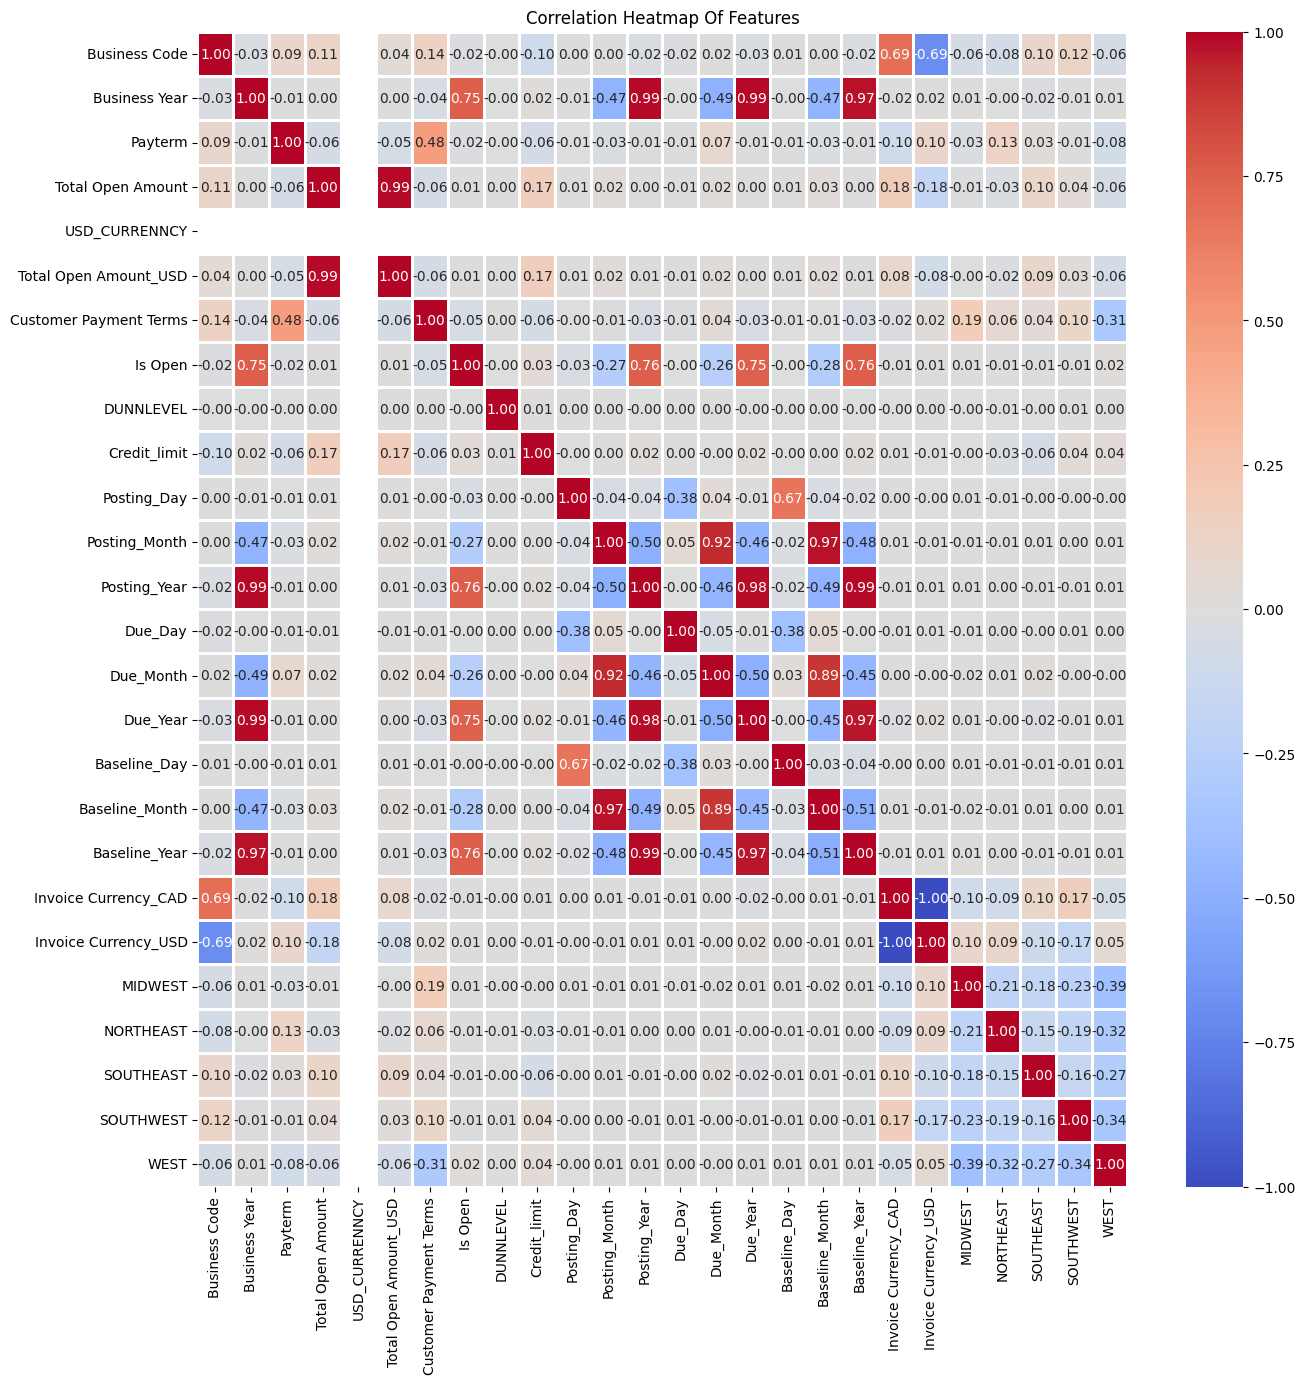

In [26]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=1.0)
plt.title('Correlation Heatmap Of Features')

# **Model Building**

**Import Mean Squared Error: Imports mean_squared_error from sklearn.metrics for evaluating regression model performance.**

**Import Train-Test Split: Imports train_test_split from sklearn.model_selection for splitting data into training and testing sets.**

In [27]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

**Define Features: Creates a feature matrix X by selecting relevant columns from the DataFrame df.**

**Define Target: Creates a target variable y by selecting the "Credit_limit" column from the DataFrame df.**

In [28]:
X = df[['Business Code', 'Business Year', 'Payterm', 'Total Open Amount',
       'USD_CURRENNCY', 'Total Open Amount_USD', 'Customer Payment Terms',
       'Is Open', 'DUNNLEVEL', 'Posting_Day', 'Posting_Month',
       'Posting_Year', 'Due_Day', 'Due_Month', 'Due_Year', 'Baseline_Day',
       'Baseline_Month', 'Baseline_Year', 'Invoice Currency_CAD',
       'Invoice Currency_USD', 'MIDWEST', 'NORTHEAST', 'SOUTHEAST',
       'SOUTHWEST', 'WEST']]

y = df[['Credit_limit']]

**Initialize Scalers: Creates MinMaxScaler instances for both features (X) and target (y), with the output transformed to a Pandas DataFrame.**

**Scale Features and Target: Scales X and y to a range of [0, 1] using the fit_transform() method.**

In [29]:
from sklearn.preprocessing import MinMaxScaler

X_Scaler = MinMaxScaler().set_output(transform = "pandas")

X = X_Scaler.fit_transform(X)

y_Scaler = MinMaxScaler().set_output(transform = "pandas")

y = y_Scaler.fit_transform(y)

**Split Data: Divides the scaled feature matrix X and target variable y into training and testing sets.**

**Specify Training Size: Uses 80% of the data for training (X_train, y_train) and 20% for testing (X_test, y_test).**

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.80)

**Initialize Model: Creates an instance of LinearRegression.**

**Train Model: Fits the linear regression model to the training data (X_train, y_train).**

**Predict: Uses the trained model to predict values on the test set (X_test).**

**Evaluate: Computes the Mean Squared Error (MSE) between the predicted values (y_pred) and the actual test values (y_test), then prints the result.**

In [31]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression()

LR.fit(X_train, y_train)

y_pred = LR.predict(X_test)

MSE = mean_squared_error(y_pred, y_test)

print("Mean Squared Error For Linear Regression: ", MSE)

Mean Squared Error For Linear Regression:  0.006767396586221311


**Initialize Model: Creates an instance of RandomForestRegressor.**

**Train Model: Fits the random forest regressor model to the training data (X_train, y_train).**

**Predict: Uses the trained model to predict values on the test set (X_test).**

**Evaluate: Computes the Mean Squared Error (MSE) between the predicted values (y_pred) and the actual test values (y_test), then prints the result.**

In [32]:
from sklearn.ensemble import RandomForestRegressor

RFR = RandomForestRegressor()

RFR.fit(X_train, y_train)

y_pred = RFR.predict(X_test)

MSE = mean_squared_error(y_pred, y_test)

print("Mean Squared Error For Random Forest: ", MSE)

Mean Squared Error For Random Forest:  0.005725636059805555


**Initialize Model: Creates an instance of DecisionTreeRegressor.**

**Train Model: Fits the decision tree regressor model to the training data (X_train, y_train).**

**Predict: Uses the trained model to predict values on the test set (X_test).**

**Evaluate: Computes the Mean Squared Error (MSE) between the predicted values (y_pred) and the actual test values (y_test), then prints the result.**

In [33]:
from sklearn.tree import DecisionTreeRegressor

DTR = DecisionTreeRegressor()

DTR.fit(X_train, y_train)

y_pred = DTR.predict(X_test)

MSE = mean_squared_error(y_pred, y_test)

print("Mean Squared Error For Decision Tree: ", MSE)

Mean Squared Error For Decision Tree:  0.010439529999999999


**Initialize Model: Creates an instance of SVR (Support Vector Regression).**

**Train Model: Fits the SVR model to the training data (X_train, y_train).**

**Predict: Uses the trained SVR model to predict values on the test set (X_test).**

**Evaluate: Computes the Mean Squared Error (MSE) between the predicted values (y_pred) and the actual test values (y_test), then prints the result.**

In [34]:
from sklearn.svm import SVR

svr = SVR()

svr.fit(X_train, y_train)

y_pred = svr.predict(X_test)

MSE = mean_squared_error(y_pred, y_test)

print("Mean Squared Error For SVR: ", MSE)

Mean Squared Error For SVR:  0.008563466191673098


# **Conclusion:**

**Based on the Mean Squared Error (MSE) values:**

- **Linear Regression: 0.0067**
- **Random Forest Regressor: 0.0057**
- **Decision Tree Regressor: 0.0104**
- **Support Vector Regression (SVR): 0.00856**

**The Random Forest Regressor (RFR) has the lowest MSE, indicating it performed the best in terms of prediction accuracy. Therefore, RFR is selected as the model for prediction.**

# **Save Model**

* **This saves the trained Random Forest model ("RFR") to a file so it can be reused without retraining.**

* **This stores the feature scaler ("X_Scaler") to apply the exact same scaling during prediction.**

* **This saves the target scaler ("y_Scaler") so predicted values can be converted back to the original scale.**

* **All saved objects must be loaded using a compatible scikit-learn version to avoid errors.**

In [35]:
import pickle

with open("Finalized-Model.pickle", "wb") as file:
    pickle.dump(RFR, file)

with open("Scaler_X.pickle", "wb") as file:
    pickle.dump(X_Scaler, file)

with open("Scaler_y.pickle", "wb") as file:
  pickle.dump(y_Scaler, file)